In [1]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature
%matplotlib inline

In [2]:
def visualize(images):
    plt.figure(figsize=(20, 20))
    for i in xrange(len(images)):
        plt.subplot(1, len(images), i + 1)
        io.imshow(images[i])
    plt.show()

In [3]:
def get_possible_d_indexes(dist, d_lower, d_upper):
    indexes = []
    lower_index = 0
    upper_index = len(dist) - 1
    mid_index = lower_index
    while (upper_index - lower_index > 1):
        mid_index = (lower_index + upper_index) // 2
        if dist[mid_index] < d_lower:
            lower_index = mid_index
        else:
            upper_index = mid_index
    while (dist[lower_index] > d_lower and lower_index > 0):
        lower_index -= 1
    while (dist[upper_index] < d_upper and upper_index < len(dist) - 1):
        upper_index += 1
    for index in xrange(lower_index, upper_index):
        if dist[index] >= d_lower and dist[index] <= d_upper:
            indexes.append(index)
    return indexes

In [13]:
def houghlines(image, theta, dist, accuracy):
    hough_matrix = np.zeros((len(dist), len(theta)))
    print (hough_matrix.shape)
    for i in xrange(image.shape[0]):
        for j in xrange(image.shape[1]):
            if not image[i][j] or (i + j) % 3 != 0:
                continue
            for th_index in xrange(len(theta)):
                th = theta[th_index]
                d_lower = i * np.cos(th) + j * np.sin(th) - accuracy
                d_upper = i * np.cos(th) + j * np.sin(th) + accuracy
                d_indexes_list = get_possible_d_indexes(dist, d_lower, d_upper)
                #for d_index in xrange(len(dist)):
                #    th = theta[th_index]
                #    d = dist[d_index]
                #    if np.abs(i * np.cos(th) + j * np.sin(th) - d) < accuracy:
                #        hough_matrix[d_index][th_index] += 1
                for d_index in d_indexes_list:
                    hough_matrix[d_index][th_index] += 1
                    
    return hough_matrix, theta, dist
                        
                        
     

In [5]:
def find_lines_scikit_hough_line(image, sigma=2.2):
    gray_image = skimage.color.rgb2gray(image)
    featured_image = feature.canny(gray_image, sigma=sigma)
    visualize([image, gray_image, featured_image])   
    h, theta, d = skimage.transform.hough_line(featured_image, np.linspace(-np.pi/2, np.pi/2, 5000))
    print (theta.shape)
    print (d.shape)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), 10*np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray)

In [6]:
def find_lines_houghlines(image,  theta, dist, accuracy, sigma=2.2):
    gray_image = skimage.color.rgb2gray(image)
    featured_image = feature.canny(gray_image, sigma=sigma)
    visualize([image, gray_image, featured_image])   
    h, theta, d = houghlines(featured_image, theta, dist, accuracy)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), 10*np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray)

In [7]:
pics = ['line1.png', 'line2.png', 'line3.png']

In [8]:
pictures = [io.imread(pic) for pic in pics]

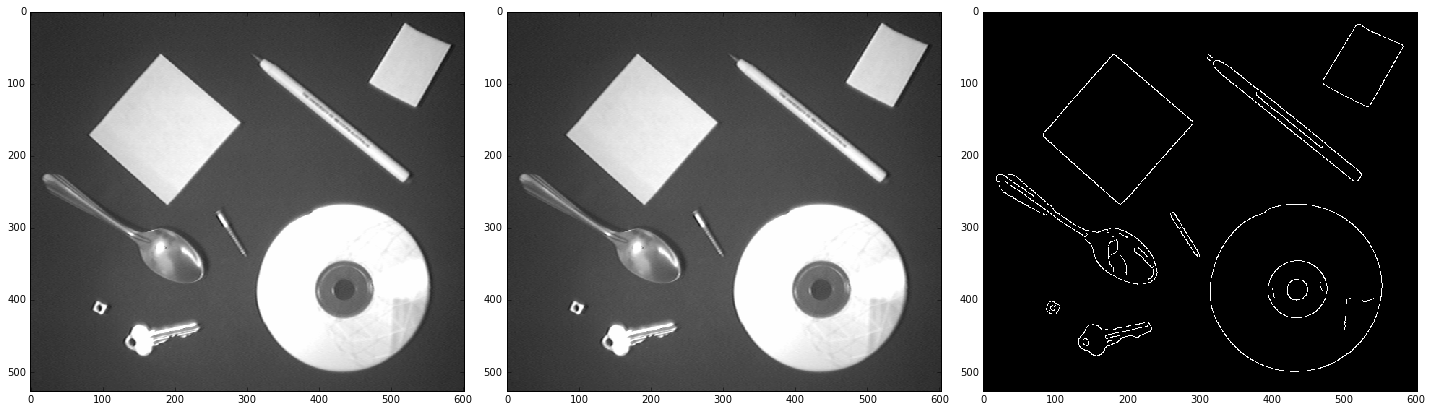

(5000,)
(1600,)


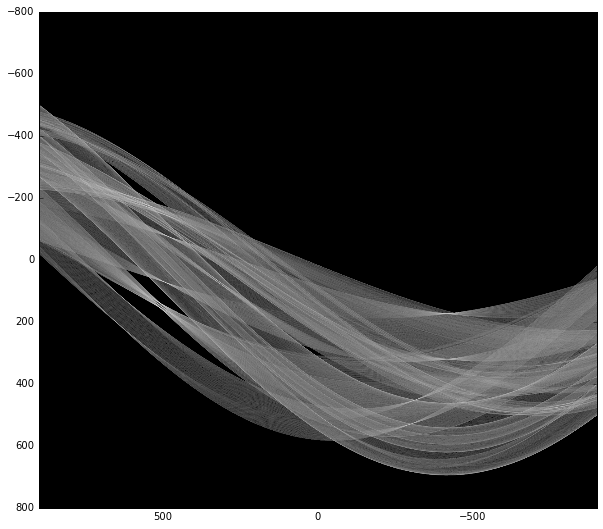

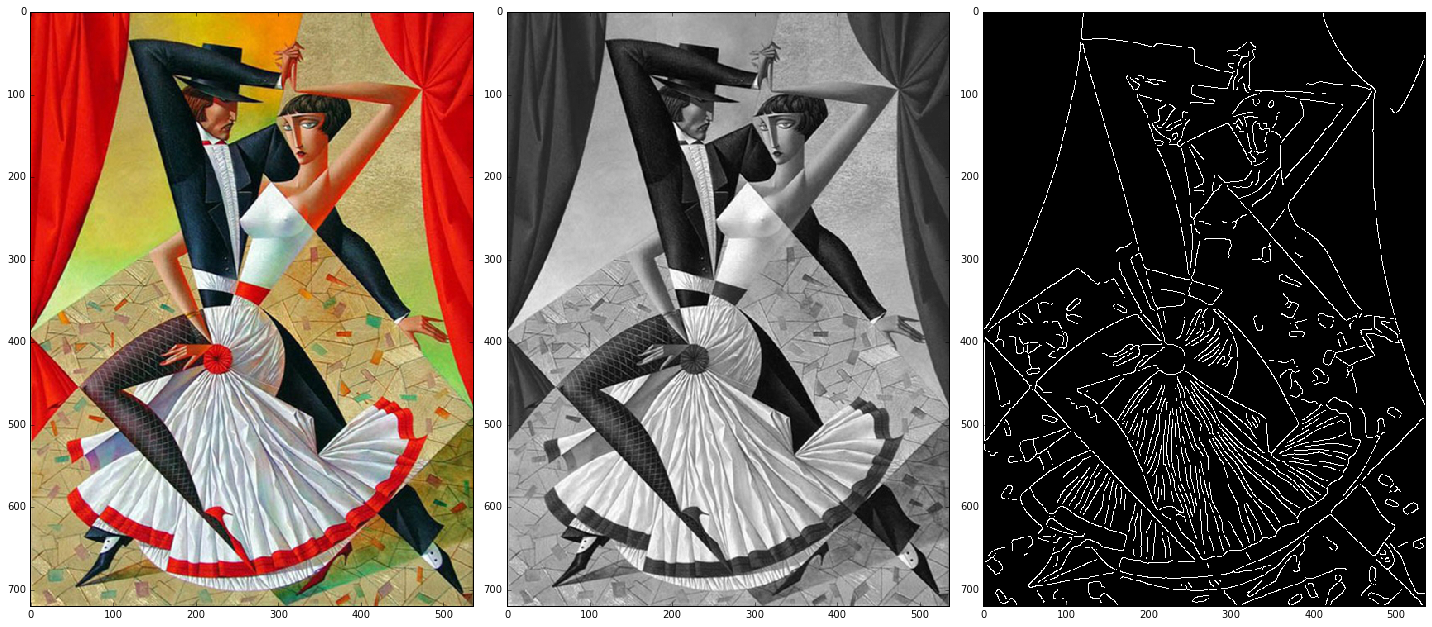

(5000,)
(1796,)


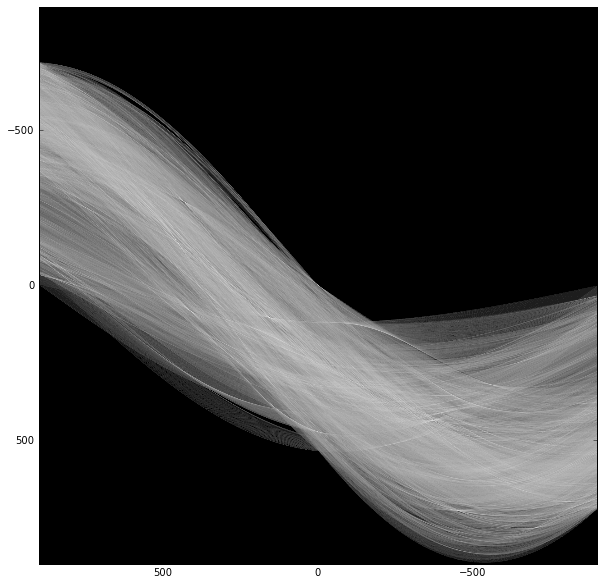

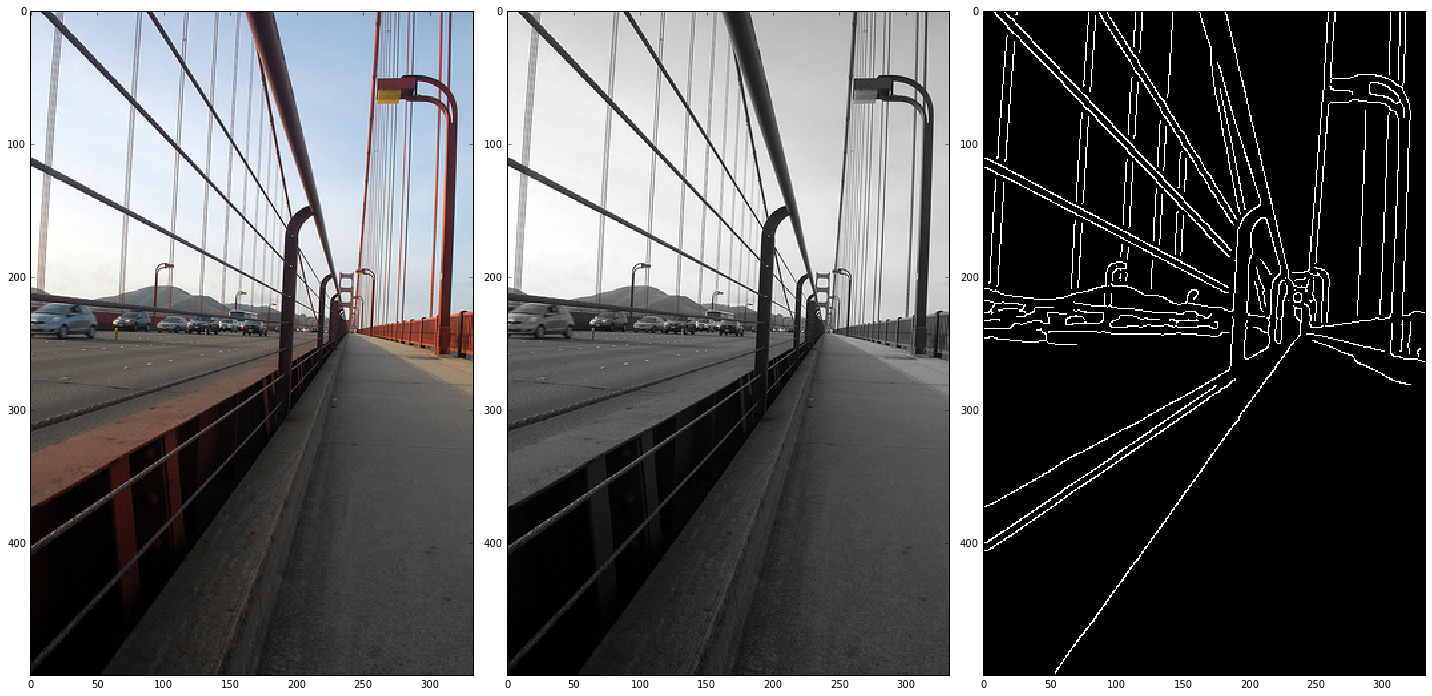

(5000,)
(1202,)


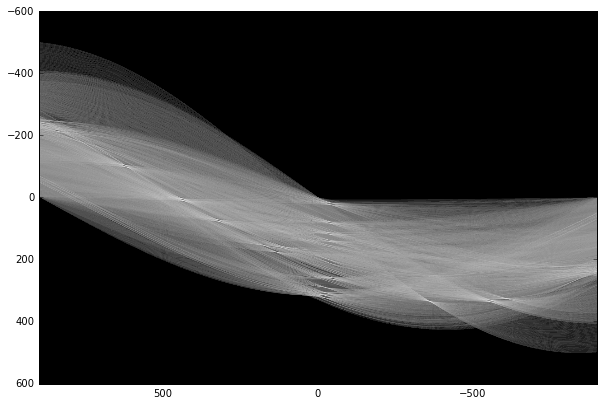

In [9]:
for picture in pictures:
    find_lines_scikit_hough_line(picture)

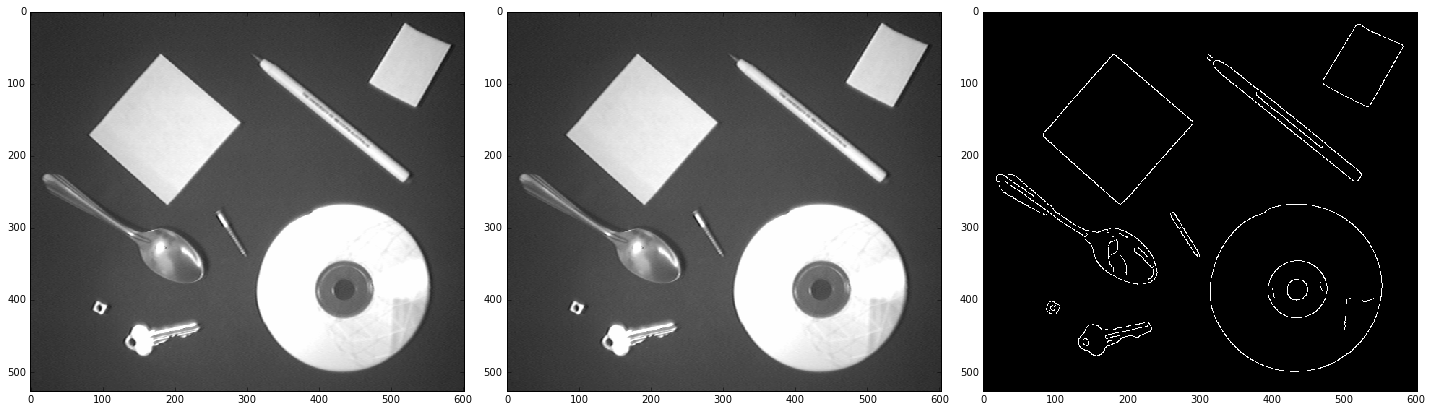

(1500, 1500)


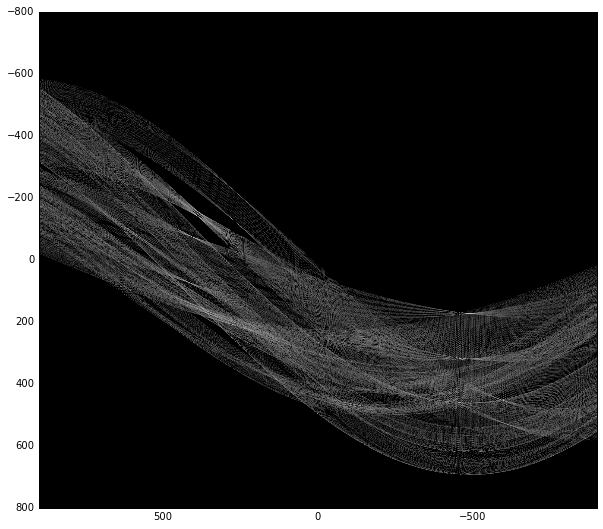

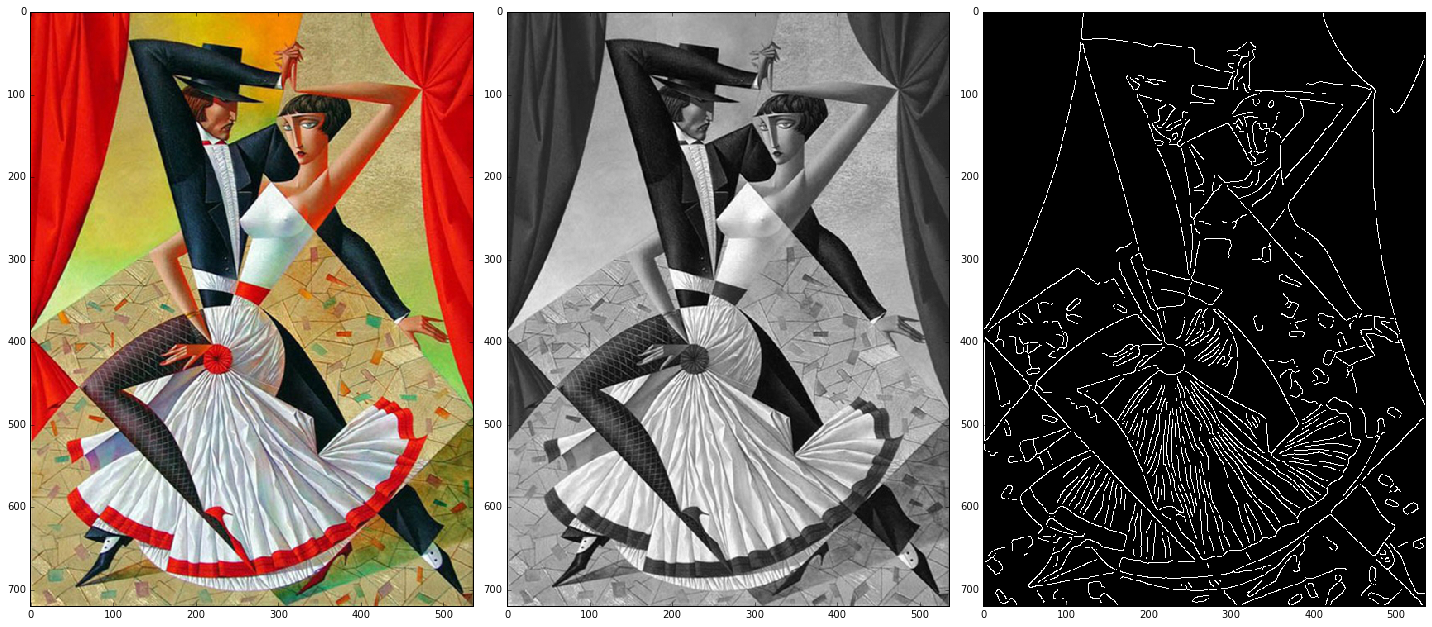

(1500, 1500)


KeyboardInterrupt: 

In [14]:
for picture in pictures:
    find_lines_houghlines(picture, np.linspace(-np.pi/2, np.pi/2, 1500), np.linspace(-800, 800, 1500), 0.2)